In [11]:
# import python libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [24]:
df = pd.read_csv('HollywoodsMostProfitableStories (1).csv', encoding= 'unicode_escape')

In [3]:
df.shape

(74, 8)

In [45]:
df.head(10)


,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,27 Dresses,Comedy,Fox,71.0,5,40.0,160.308654,2008
1,(500) Days of Summer,Comedy,Fox,81.0,8,87.0,60.720000,2009
2,A Dangerous Method,Drama,Independent,89.0,0,79.0,8.972895,2011
3,A Serious Man,Drama,Universal,64.0,4,89.0,30.680000,2009
4,Across the Universe,Romance,Independent,84.0,0,54.0,29.367143,2007
5,Beginners,Comedy,Independent,80.0,4,84.0,14.310000,2011
6,Dear John,Drama,Sony,66.0,4,29.0,114.970000,2010
7,Enchanted,Comedy,Disney,80.0,4,93.0,340.487652,2007
8,Fireproof,Drama,Independent,51.0,66,40.0,33.467000,2008
9,Four Christmases,Comedy,Warner Bros.,52.0,2,26.0,161.834000,2008


In [ ]:
*************************** DATA CLENING *****************************************

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Film               74 non-null     object 
 1   Genre              74 non-null     object 
 2   Lead Studio        73 non-null     object 
 3   Audience  score %  73 non-null     float64
 4   Profitability      71 non-null     float64
 5   Rotten Tomatoes %  73 non-null     float64
 6   Worldwide Gross    74 non-null     float64
 7   Year               74 non-null     int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 4.8+ KB


In [6]:
pd.isnull(df).sum()

Film                 0
Genre                0
Lead Studio          1
Audience  score %    1
Profitability        3
Rotten Tomatoes %    1
Worldwide Gross      0
Year                 0
dtype: int64

In [7]:
df.shape

(74, 8)

In [8]:
# drop null values
df.dropna(inplace=True)

In [9]:
df.shape

(69, 8)

In [10]:
# change data type
df['Profitability'] = df['Profitability'].astype('int')

In [11]:
df['Profitability'].dtypes

dtype('int32')

In [12]:
df.columns

Index(['Film', 'Genre', 'Lead Studio', 'Audience  score %', 'Profitability',
       'Rotten Tomatoes %', 'Worldwide Gross', 'Year'],
      dtype='object')

In [ ]:
 **********   Exploratory Data Analysis   **************************

C:\Users\mansi\AppData\Local\Temp\ipykernel_22856\3228145322.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'Genre',data = df , palette=palette)


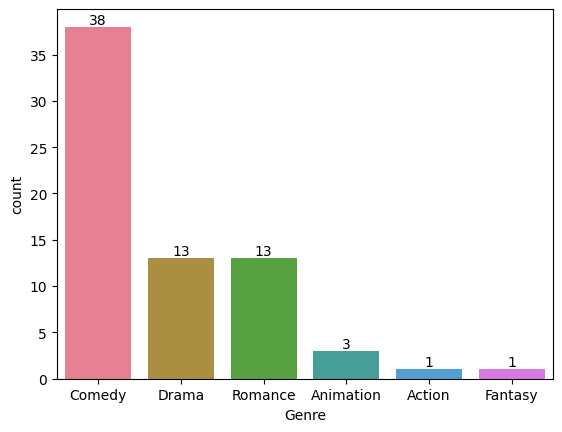

In [18]:
palette = sns.color_palette("husl", df['Genre'].nunique())
ax = sns.countplot(x = 'Genre',data = df , palette=palette)

for bars in ax.containers:
    ax.bar_label(bars)
    

<Axes: xlabel='Genre', ylabel='Audience  score %'>

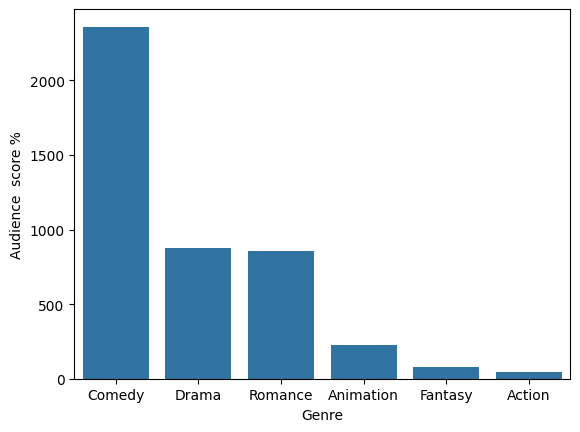

In [37]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Genre'], as_index=False)['Audience  score %'].sum().sort_values(by='Audience  score %', ascending=False)

sns.barplot(x = 'Genre',y= 'Audience  score %' ,data = sales_gen)

In [ ]:
From above graphs we can see that most of the audience are watch comedy movie and audeince score is aslo greter than other filed

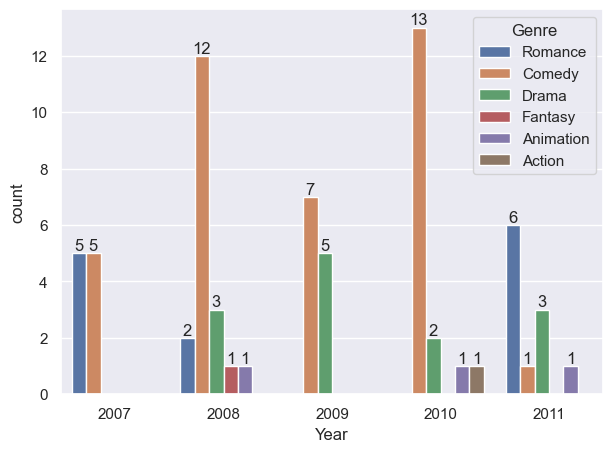

In [91]:
ax = sns.countplot(data = df, x = 'Year', hue = 'Genre')

for bars in ax.containers:
    ax.bar_label(bars)

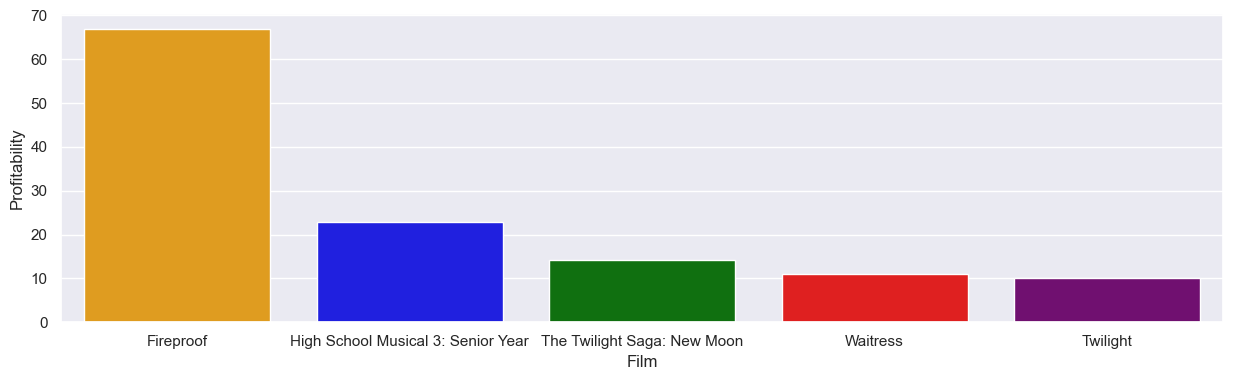

In [43]:
# total profit/film from top 5 states
custom_colors = ['orange', 'blue', 'green', 'red', 'purple']
custom_palette = sns.color_palette(custom_colors)
sales_state = df.groupby(['Film'], as_index=False)['Profitability'].sum().sort_values(by='Profitability', ascending=False).head(5)

sns.set(rc={'figure.figsize':(15,4)})
sns.barplot(data = sales_state, x = 'Film',y= 'Profitability' , hue='Film', palette=custom_palette, dodge=False, legend=False)
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

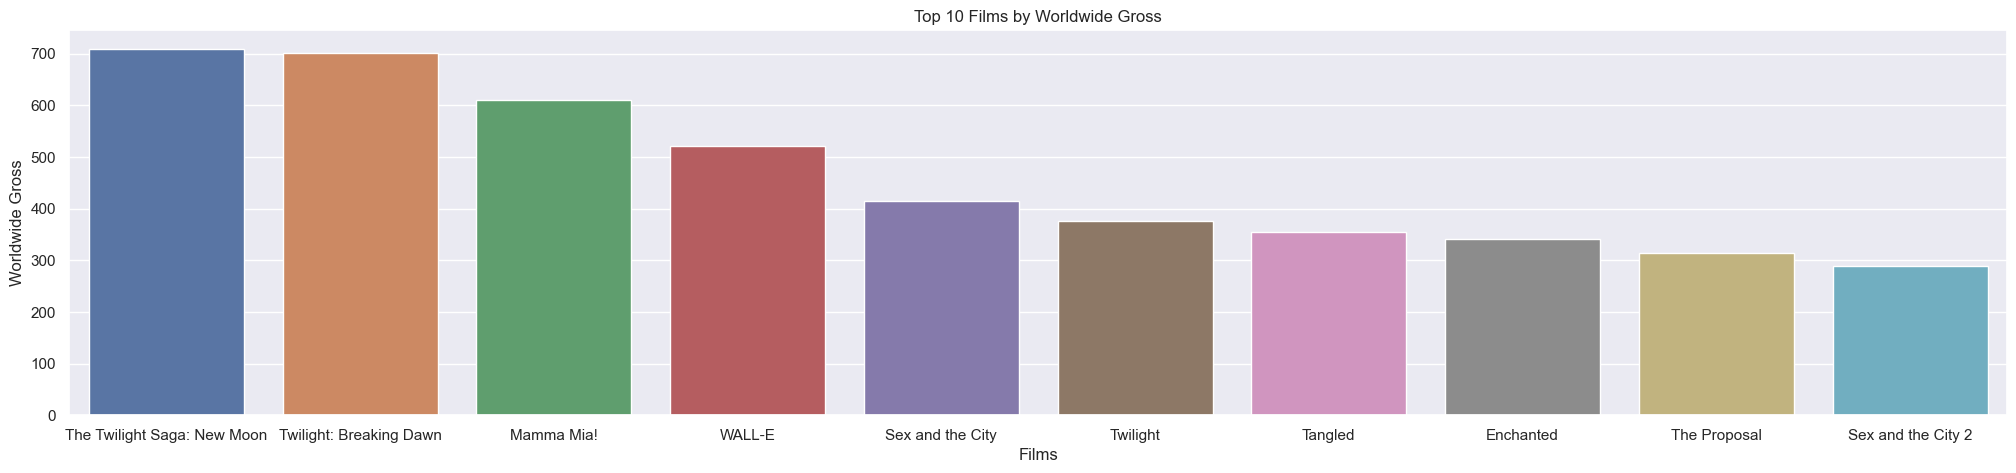

In [35]:

sales_state = df.groupby(['Film'], as_index=False)['Worldwide Gross'].sum().sort_values(by='Worldwide Gross', ascending=False).head(10)

# Set the figure size
sns.set(rc={'figure.figsize': (25, 5)})

# Create the bar plot using the default palette
sns.barplot(data=sales_state, x='Film', y='Worldwide Gross', hue='Film', dodge=False, legend=False)

# Set axis labels and title for clarity
plt.xlabel("Films")
plt.ylabel("Worldwide Gross")
plt.title("Top 10 Films by Worldwide Gross")

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Show the plot
plt.show()

